# Module 4a - Multidimensionality - Wisconsin Cancer Dataset

In this module we will work on Wisconsin Cancer Dataset used in Kaggle Competition.

The breast cancer dataset is a classic and very easy **binary classification** dataset.  
Cancer are classified  whether the cancer is benign or malignant.


| Feature  | Value |
| ------------- | ------------- |
| Classes            | 2 |
| Samples per class  | 212(M),357(B) |
| Samples total      | 569 |
| Dimensionality     | 30 |

Of course, first you can plot distribution individually using what we did before.   
Check correlation etc...

When you start to have a lof of variables/features, it can be hard to gain insight from visualising them together.

But then you might want to be interested to know if somes features can be usefull to classify group of data labelled differentely. 

So you will use techniques of dimension reduction like PCA, T-SNE & UMAP.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

sns.set_context("notebook",font_scale=1.1)

#########################################################
################   Cancer Data Set      #################
#########################################################
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() 

# What do you see inside ?
# we can see that there are 30 columns and each of them are numerical values.
# So we can directly apply PCA.

#print(cancer)
# creating dataframe 
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
# checking head of dataframe 
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA



Running PCA ...
Explained variance: 1.0000
Individual variance contributions:
0.9820446715106592
0.016176489863511046
0.0015575107450152383
0.00012093196354011662
8.827245358462168e-05
6.648839512394109e-06
4.017136820084852e-06
8.220171966557916e-07
3.441352786163568e-07
1.8601872147775942e-07
6.994732053514199e-08
1.659088796383865e-08
6.996416497608449e-09
4.783183055948631e-09
2.935492139063719e-09
1.4168492662618957e-09
8.295777313432733e-10
5.204058825132493e-10
4.0846398291884436e-10
3.6331337781398107e-10


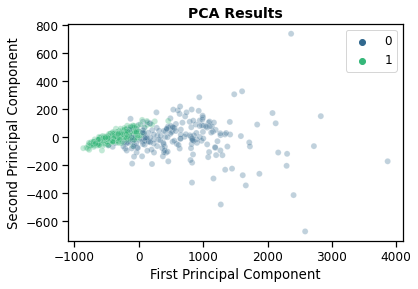

In [2]:

#################### 1. PCA ########################

n_comp = 20
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp,  random_state=1001)
# Perform PCA
X_pca = pca.fit_transform(df)

print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

sns.scatterplot(x= X_pca[:, 0], y = X_pca[:, 1], hue = cancer['target'],
palette = 'viridis', alpha=0.3) 

plt.title('PCA Results',weight='bold').set_fontsize('14') 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')
plt.show()
#plt.savefig('./figure/PCA.Cancer.png', dpi=300)
plt.clf()
plt.close()



## PCA-normalised

Sometimes you can use pearson in order to do your PCA.


Explained variance: 0.9956
Individual variance contributions:
0.44272025607526283
0.18971182044033058
0.09393163257431375
0.06602134915470154
0.054957684923462674
0.0402452203988334
0.02250733712982506
0.015887238000213303
0.013896493745591106
0.011689781894131486
0.009797189875980187
0.00870537900737883
0.008045249871967322
0.005233657454926352
0.0031378321676273978
0.002662093365152314
0.001979967925324275
0.0017539594502263614
0.0016492530592251639
0.0010386467483387038


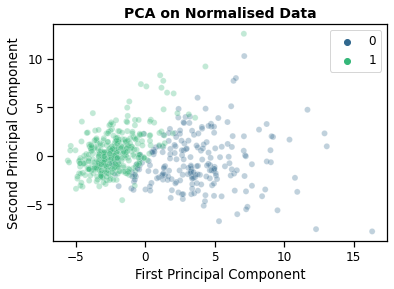

In [3]:

#################### 2. PCA with Normalised Data ########################

scalar = StandardScaler() 
scalar.fit(df)  #Compute the mean and std to be used for later scaling.
scaled_data = scalar.transform(df) #Perform standardization by centering and scaling.

pca = PCA(n_components=n_comp,  random_state=1001)
X_pca = pca.fit_transform(scaled_data)

print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

#plt.figure(figsize =(8, 6)) 
sns.scatterplot(x= X_pca[:, 0], y = X_pca[:, 1], hue = cancer['target'],palette='viridis', alpha=0.3) 
plt.title('PCA on Normalised Data',weight='bold').set_fontsize('14') 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')

plt.show()
#plt.savefig('./figure/PCA.Scaled.Cancer.png', dpi=300)
plt.clf()
plt.close()


## T-sne

<u>Note :</u> The perplexity value has a complex effect on the resulting pictures.


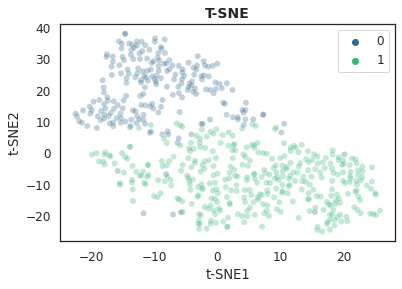

In [4]:

#################### 3. T-sne with Normalised Data ########################


tsne_model = TSNE(n_components=2, perplexity=30, random_state=2020)
# Perform t-SNE
embed = tsne_model.fit_transform(scaled_data)

sns.set_style("white")

sns.scatterplot(x= embed[:, 0], y = embed[:, 1], hue = cancer['target'],
palette='viridis', alpha = 0.3) 
plt.title('T-SNE',weight='bold').set_fontsize('14') 
plt.xlabel('t-SNE1') 
plt.ylabel('t-SNE2')
plt.show()
#plt.savefig('./figure/Tsnee.Scaled.Cancer.png', dpi=300)
plt.clf()
plt.close()
